In [1]:
from nllgrid import NLLGrid
import numpy as np
import pandas as pd
import utm
import xarray as xr
import matplotlib.pyplot as plt

In [17]:
# ## Open the .ncfiles for Layer1,2,and 3
# L1 = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/output/testL1PL.nc")
# # L2 = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/output/testL2PL.nc")
# # L3 = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/output/testL3PL.nc")

In [27]:
# L1i = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/output/L1i.nc")
# L2i = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/output/L2i.nc")
# L3i = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/output/L3i.nc")

In [2]:
path = '/Users/banjo/Projects/nll_pnsn/velocityModels/binaryCVM' 
binModelName=path+'/vs_16l3.bin'

In [3]:
# The SW corner of the velocity model is -10800m East, 4467300m N Zone 10.
SWcornerFull = [-10800, 4467300]
    #
nx = 727; ny = 1193; nz = 55
dx = 900; dy = 900;  dz = 900
zmin = 10800; zmax = 59400

    # Read in binary file
v = np.fromfile(binModelName, dtype='<f4')

# Generate arrays for x, y, & z locations
z = np.linspace(zmin, zmax, nz)
z = np.repeat(z, (np.ones(len(z))*nx*ny).astype(int))
z = z[::-1]             # Reverse array

y = np.linspace(SWcornerFull[1], SWcornerFull[1]+ny*dy, ny, endpoint=False)
y = np.repeat(y, (np.ones(len(y))*nx).astype(int))
y = np.tile(y, nz)     # Repeat array for each depth

x = np.linspace(SWcornerFull[0], SWcornerFull[0]+nx*dx, nx, endpoint=False)
x = np.tile(x, ny*nz)

    # Convert CVM to dataframe
#     model = pd.DataFrame(np.column_stack((x,y,z,v)), columns=['utme','utmn','z',(binModelName.split('/'))[1].split('_16')[0]])
model = pd.DataFrame(np.column_stack((x,y,z,v)), columns=['utme','utmn','z','vp'])

model.describe()

# subModel = model[(model["z"] >= zTop) & (model["z"] <= zBot)
#                              & (model["utme"] >= min_utme) & (model["utme"] <= max_utme)
#                              & (model["utmn"] >= min_utmn) & (model["utmn"] <= max_utmn)]
# subModel = subModel.set_index(['utme','utmn','z'])    # Set these parameters as coordinates




,utme,utmn,z,vp
count,4.770210e+07,4.770210e+07,4.770210e+07,4.770210e+07
mean,3.159000e+05,5.003700e+06,3.510000e+04,4.387358e+03
std,1.888800e+05,3.099504e+05,1.428706e+04,4.417829e+02
min,-1.080000e+04,4.467300e+06,1.080000e+04,3.080849e+03
25%,1.521000e+05,4.735500e+06,2.250000e+04,4.100416e+03
50%,3.159000e+05,5.003700e+06,3.510000e+04,4.612027e+03
75%,4.797000e+05,5.271900e+06,4.770000e+04,4.705096e+03
max,6.426000e+05,5.540100e+06,5.940000e+04,4.813004e+03


In [4]:
utme_min = np.min(model['utme'].values)
utme_max = np.max(model['utme'].values)
utmn_min = np.min(model['utmn'].values)
utmn_max = np.max(model['utmn'].values)

In [9]:
utme_min

-10800.0

In [10]:
utme_max

642600.0

In [14]:
utmn_min

4467300.0

In [13]:
utmn_max

5540100.0

In [25]:
(utme_min-utme_max*-1)/1000

631.8

In [26]:
(utmn_max-utmn_min)/1000

1072.8

In [18]:
# UTM and LatLon converter - have to pick one of the two either from latlon or to latlon.then run it. 
def find_origin(x,y):
    #utmCoords = utm.from_latlon(x,y)
    laloCoords = utm.to_latlon(x,y, 10, 'T') 
    return laloCoords # utmCoords

In [19]:
find_origin(utme_min,utmn_min)

OutOfRangeError: easting out of range (must be between 100,000 m and 999,999 m)

In [ ]:
# def readBinary(zTop=0, zBot=1200,
#                min_utme=None, max_utme=None,
#                min_utmn=None, max_utmn=None,
#                newModelName='subModel.nc',
#                binModelName='',
#                saveFull='N'):
#     """
#     Read in 3-D CVM from binary files.

#     This function only works with one binary file at a time.
#     Input parameters are used to specify bounds of a sub-model,
#     if only a small chunk of the full CVM is needed.

#     Offshore water is set to V=1e20 in binary files.

#     All UTM coordinates are given for Zone 10T.

#     For Puget Lowland: zTop=0, zBot=200,
#                min_utme=446700, max_utme=567100,
#                min_utmn=5194300, max_utmn=5316700,
#                modelName='subModel_0_200m_PL.nc'

#     Parameters:
#     zTop: Top of sub-model [m]
#     zBot: Bottom of sub-model [m]
#     min_utme: Minimum easting [m]
#     max_utme: Maximum easting [m]
#     min_utmn: Minimum northing [m]
#     max_utmn: Maximum northing [m]

#     Returns:
#     subModelxr: Sub-model in xarray format

#     """

#     # The following lines describe the size of the binary file values.
#     #
#     # Layer 1 0-1200m depth
#     # 3271 in EW direction
#     # 5367 in NS direction
#     # 13 in z
#     # dx=dy= 200m,  dz= 100m
#     #
#     if 'l1' in binModelName:
#         nx = 3271; ny = 5367; nz = 13
#         dx = 200;  dy = 200;  dz = 100
#         zmin = 0; zmax = 1200
   
#     # Layer 2 1500-9900m depth
#     # 2181 in EW
#     # 3578 in NS
#     # 29 in z
#     # dx=dy=dz=300m
#     #
#     if 'l2' in binModelName:
#         nx = 2181; ny = 3578; nz = 29
#         dx = 300;  dy = 300;  dz = 300
#         zmin = 1500; zmax = 9900
#     #
#     # Layer 3 10800-59400m depth
#     # 727 in EW
#     # 1193 NS
#     # 55 in z
#     # dx=dy=dz=900m
#     #
#     if 'l3' in binModelName:
#         nx = 727; ny = 1193; nz = 55
#         dx = 900; dy = 900;  dz = 900
#         zmin = 10800; zmax = 59400
#     #
#     # The SW corner of the velocity model is -10800m East, 4467300m N Zone 10.
#     SWcornerFull = [-10800, 4467300]
#     #

#     # Read in binary file
#     v = np.fromfile(binModelName, dtype='<f4')

#     # Generate arrays for x, y, & z locations
#     z = np.linspace(zmin, zmax, nz)
#     z = np.repeat(z, (np.ones(len(z))*nx*ny).astype(int))
#     z = z[::-1]             # Reverse array

#     y = np.linspace(SWcornerFull[1], SWcornerFull[1]+ny*dy, ny, endpoint=False)
#     y = np.repeat(y, (np.ones(len(y))*nx).astype(int))
#     y = np.tile(y, nz)     # Repeat array for each depth

#     x = np.linspace(SWcornerFull[0], SWcornerFull[0]+nx*dx, nx, endpoint=False)
#     x = np.tile(x, ny*nz)

#     # Convert CVM to dataframe
# #     model = pd.DataFrame(np.column_stack((x,y,z,v)), columns=['utme','utmn','z',(binModelName.split('/'))[1].split('_16')[0]])
#     model = pd.DataFrame(np.column_stack((x,y,z,v)), columns=['utme','utmn','z','vp'])

#     if saveFull == 'N' or saveFull == 'n':
#         # Subset model (speed things up)
#         if min_utme==None:
#             # Use full horizontal model extent
#             subModel = model[(model["z"] >= zTop) & (model["z"] <= zBot)]
#         else:
#             subModel = model[(model["z"] >= zTop) & (model["z"] <= zBot)
#                              & (model["utme"] >= min_utme) & (model["utme"] <= max_utme)
#                              & (model["utmn"] >= min_utmn) & (model["utmn"] <= max_utmn)]
#         subModel = subModel.set_index(['utme','utmn','z'])    # Set these parameters as coordinates

#         # Convert to xarray (slow)
#         subModelxr = subModel.to_xarray()

#         # Save xarray for faster reload later
#         subModelxr.to_netcdf('../output/' + newModelName)

#         return subModelxr

#     # This can be VERY slow (~ 1 hour)
#     if saveFull == 'Y' or saveFull == 'y':
#         model = model.set_index(['utme','utmn','z'])
#         modelxr = model.to_xarray()
#         modelxr.to_netcdf('../output/' + (binModelName.split('/'))[1].split('.bin')[0]+'.nc')

#         return modelxr

In [28]:
L3i

<xarray.Dataset>
Dimensions:  (utme: 1198, utmn: 1216, z: 487)
Coordinates:
  * utme     (utme) float64 4.473e+05 4.474e+05 4.475e+05 ... 5.669e+05 5.67e+05
  * utmn     (utmn) float64 5.194e+06 5.195e+06 ... 5.316e+06 5.316e+06
  * z        (z) float64 1.08e+04 1.09e+04 1.1e+04 ... 5.93e+04 5.94e+04
Data variables:
    vp       (utme, utmn, z) float64 ...

In [29]:
L2i

<xarray.Dataset>
Dimensions:  (utme: 1204, utmn: 1222, z: 85)
Coordinates:
  * utme     (utme) float64 4.467e+05 4.468e+05 4.469e+05 ... 5.669e+05 5.67e+05
  * utmn     (utmn) float64 5.194e+06 5.195e+06 ... 5.316e+06 5.317e+06
  * z        (z) float64 1.5e+03 1.6e+03 1.7e+03 ... 9.7e+03 9.8e+03 9.9e+03
Data variables:
    vp       (utme, utmn, z) float64 ...

## Dealing with odd dimensions L1 
### dxdy = 200m dz = 100m
What I am doing here is doubling the nodes in the x and y direction, so L1 is dxdydz = 100m

In [4]:
# def resample_layer(Ln,step_size,Lni):
#     """ 
    
#     """
#     new_utme = np.arange(Ln.utme[0], Ln.utme[-1]+100, step_size)
#     new_utmn = np.arange(Ln.utmn[0], Ln.utmn[-1]+100, step_size)
#     new_z = np.arange(Ln.z[0],Ln.z[-1]+100,step_size)
#     Lni = Ln.interp(utme=new_utme, utmn=new_utmn,z=new_z)
#     return Lni

In [5]:
# L1

In [6]:
# L1.vp[:,:,12].plot()

In [7]:
# new_utme = np.arange(L1.utme[0], L1.utme[-1]+100, 100)
# new_utmn = np.arange(L1.utmn[0], L1.utmn[-1]+100, 100)
# new_z = np.arange(L1.z[0],L1.z[-1]+100,100)
# L1i = L1.interp(utme=new_utme, utmn=new_utmn,z=new_z)

In [8]:
# L1i

L1i = a new dataset

## Doing this for L2 now, which is dxdydz = 300m 

In [9]:
# L2

In [10]:
# new_utme = np.arange(L2.utme[0], L2.utme[-1]+100, 100)
# new_utmn = np.arange(L2.utmn[0], L2.utmn[-1]+100, 100)
# new_z = np.arange(L2.z[0],L2.z[-1]+100,100)
# L2i = L2.interp(utme=new_utme, utmn=new_utmn,z=new_z)

In [11]:
# L2i

In [12]:
# ## L3 interp
# new_utme = np.arange(L3.utme[0], L3.utme[-1]+100, 100)
# new_utmn = np.arange(L3.utmn[0], L3.utmn[-1]+100, 100)
# new_z = np.arange(L3.z[0],L3.z[-1]+100,100)
# L3i = L3.interp(utme=new_utme, utmn=new_utmn,z=new_z)

In [13]:
# L3i

The next step is to add the layers together. 
L3 nodes are the keys and L1 nodes and L2 nodes will be added to the L3 based on the node number. 

In [14]:
# L3

In [15]:
# L2L3 = L2i.where(L2i.utme == L3.utme)
# L2L3 = L2L3.where(L2L3.utmn == L3.utmn)
# L2L3 = xr.merge([L2L3,L3])

In [16]:
# L2L3

In [17]:
# L2L3 = L2i.where(L2i.utme == L3.utme)
# L2L3 = L2L3.where(L2L3.utmn == L3.utmn)
# L2L3 = xr.merge([L2L3,L3])

Now L1i is added to the new Dataset , ds, that was just created. 

In [18]:
# L1L2L3 = L1i.where(L1i.utme == L2L3.utme)
# L1L2L3 = L1L2L3.where(L1L2L3.utmn == L2L3.utmn)
# ds = xr.merge([L1L2L3,L2L3])

In [19]:
# ds

Now we are going to interpolate between the three layers to smooth everything out at 1km spacing

In [20]:
# new_utme = np.arange(ds.utme[0], ds.utme[-1], 500)
# new_utmn = np.arange(ds.utmn[0], ds.utmn[-1], 500)
# new_z = np.arange(ds.z[0],ds.z[-1],500)
# # new_z = np.arange(ds.z[0],ds.z[-1],300)
# dsi = ds.interp(utme=new_utme, utmn=new_utmn,z=new_z)
# # dsi = ds.interp(z=new_z)

In [19]:
dsi = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/velocityModels/velMod_scripts/DSi_PL.0.1km_spacing.nc")

In [20]:
dsi

<xarray.Dataset>
Dimensions:  (utme: 240, utmn: 244, z: 119)
Coordinates:
  * utme     (utme) float64 4.473e+05 4.478e+05 ... 5.663e+05 5.668e+05
  * utmn     (utmn) float64 5.194e+06 5.195e+06 ... 5.316e+06 5.316e+06
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 5.8e+04 5.85e+04 5.9e+04
Data variables:
    vp       (utme, utmn, z) float64 ...

Here we calculate the slow_len based on how Lomax describes in NLLoc Documentation 

In [16]:
# ## convert xarray.Dataset to pandas.DataFrame
# df = dsi.to_dataframe()
# df = df.reset_index()
# # Convert to slow_len for NLLoc
# df['vp'] = (df['vp'].values)/1000 ## Convert m/s to km/s 
# df['p'] = ((df['vp'].values)**-1)*0.5 ## km/s to 1/v*ds (eqn 1 Gempa Lomax)
# df = df[['utme','utmn','z','p']]
# df = df.set_index(['utme','utmn','z'])
# newModel = df.to_xarray()

In [17]:
newModel

<xarray.Dataset>
Dimensions:  (utme: 240, utmn: 243, z: 119)
Coordinates:
  * utme     (utme) float64 4.473e+05 4.478e+05 ... 5.663e+05 5.668e+05
  * utmn     (utmn) float64 5.194e+06 5.195e+06 ... 5.315e+06 5.316e+06
  * z        (z) float64 0.0 500.0 1e+03 1.5e+03 ... 5.8e+04 5.85e+04 5.9e+04
Data variables:
    p        (utme, utmn, z) float64 0.1219 0.1181 0.1146 ... 0.06508 0.06475

In [18]:
# df.iloc[0].name[0]
# df.iloc[0].name[1]
# newModel.utme[0]
# utm.to_latlon(newModel.utme[0],newModel.utmn[0],10,"T")
# grid_origin

In [19]:
# Use NLLGrid Class to make buffer files 
grd = NLLGrid()
grid_origin = utm.to_latlon(df.iloc[0].name[0],df.iloc[0].name[0],10,"T")
mydata = newModel.p
grd.array = mydata
grd.dx = 0.3  #km
grd.dy = 0.3  #km
grd.dz = 0.3 #km
grd.x_orig = 0  #km
grd.y_orig = 0 #km
grd.z_orig = -3.0  #km
grd.type = 'SLOW_LEN'
grd.orig_lat =  grid_origin[0]
grd.orig_lon = grid_origin[1]
grd.proj_name = 'SIMPLE'
# grd.proj_ellipsoid = 'WGS-84'
# grd.basename = 'testcvmFull_0.3km.P.mod'
# grd.write_hdr_file()
# grd.write_buf_file()

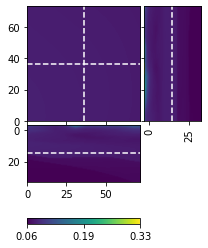

In [20]:
grd.plot()

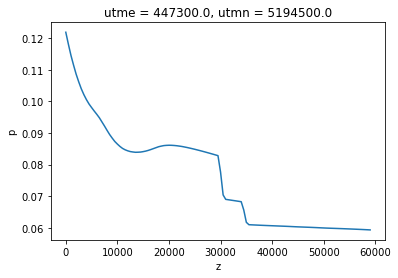

In [21]:
newModel.p[0][0].plot()

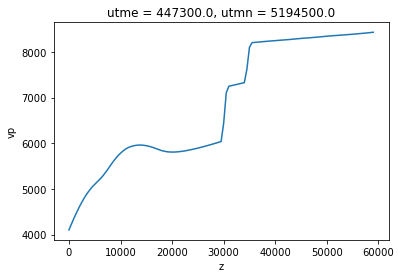

In [23]:
dsi.vp[0][0].plot()

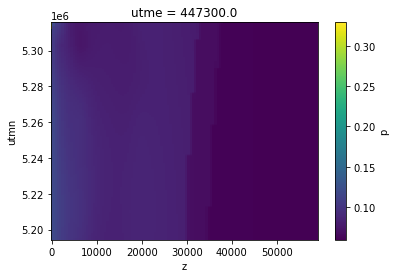

In [23]:
newModel.p[0].plot()

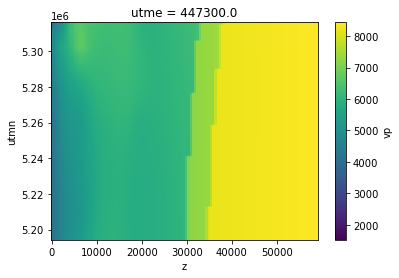

In [24]:
dsi.vp[0].plot()

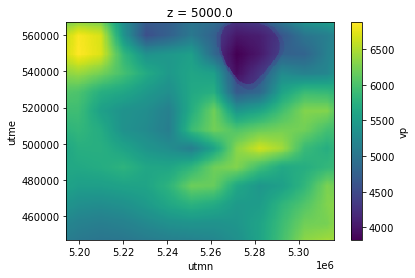

In [25]:
dsi.vp[:,:,10].plot()

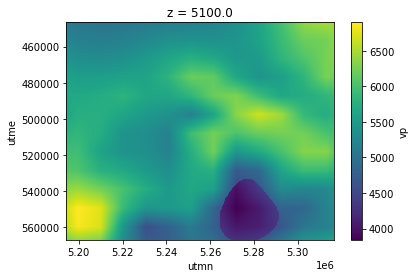

In [64]:
L2.vp[:,:,12].plot()
plt.gca().invert_yaxis()
# plt.gca()

In [ ]:
# air2d.plot(cmap=plt.cm.Blues)


# plt.title("These colors prove North America\nhas fallen in the ocean")
# Out[53]: Text(0.5, 1.0, 'These colors prove North America\nhas fallen in the ocean')

# plt.ylabel("latitude")
# Out[54]: Text(0, 0.5, 'latitude')

# plt.xlabel("longitude")
# Out[55]: Text(0.5, 0, 'longitude')

# plt.tight_layout()

# plt.draw()

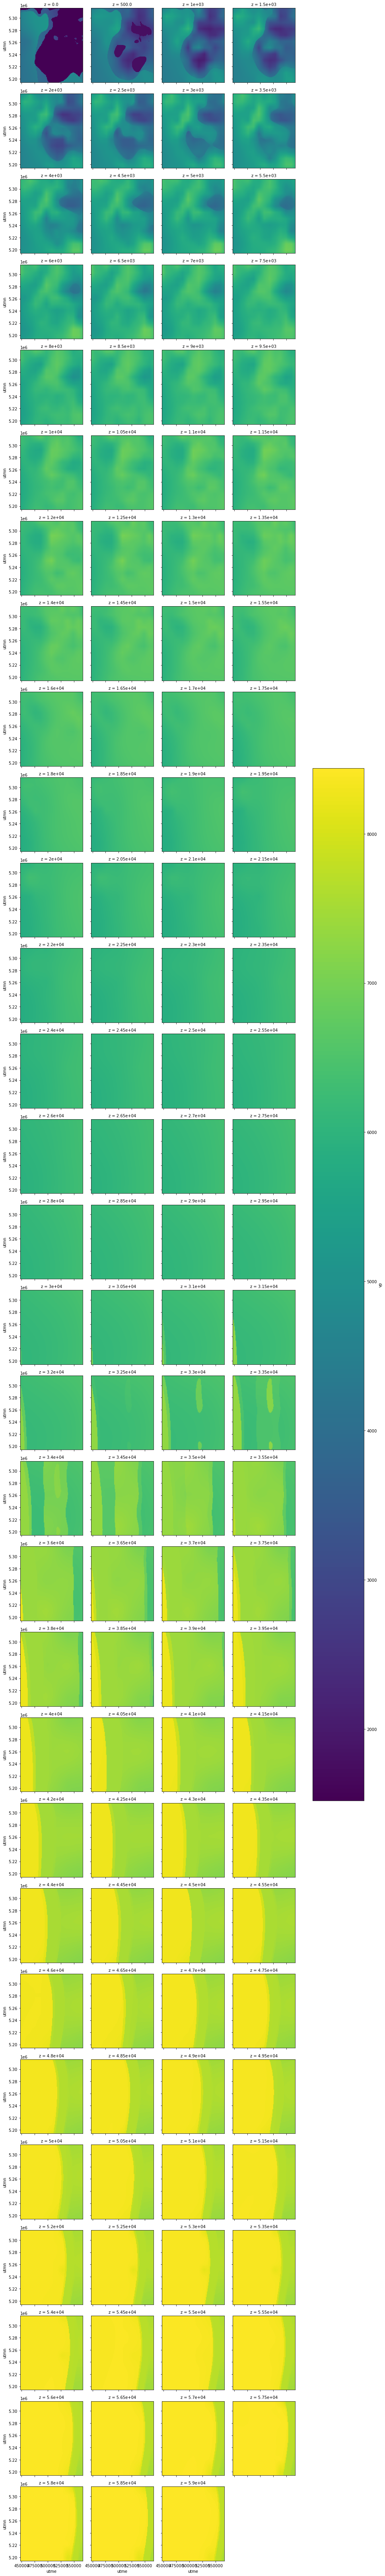

In [26]:
dsi.vp.plot(x="utme", y="utmn", col="z",col_wrap = 4)
# plt.grid(color='r', linestyle='-', linewidth=2)
# plt.savefig('/Users/banjo/Projects/nll_pnsn/figures/nll_py/plotL1_slices.png')
# plt.draw()

In [3]:
ds = xr.open_dataset("/Users/banjo/Projects/nll_pnsn/velocityModels/velMod_scripts/DS_PL.0.1km_spacing.nc")

In [4]:
ds

<xarray.Dataset>
Dimensions:  (utme: 1198, utmn: 1216, z: 585)
Coordinates:
  * z        (z) float64 0.0 100.0 200.0 300.0 ... 5.92e+04 5.93e+04 5.94e+04
  * utmn     (utmn) float64 5.194e+06 5.195e+06 ... 5.316e+06 5.316e+06
  * utme     (utme) float64 4.473e+05 4.474e+05 4.475e+05 ... 5.669e+05 5.67e+05
Data variables:
    vp       (utme, utmn, z) float64 ...

In [ ]:
# ds.vp.plot(x="utme", y="utmn", col="z",col_wrap = 4)

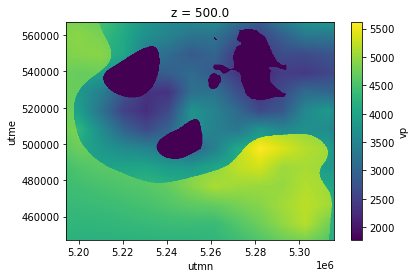

In [25]:
# ds.vp[0].plot()
ds.vp[:,:,5].plot()

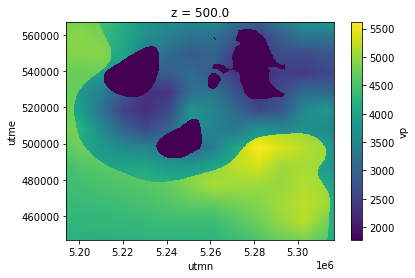

In [26]:
L1.vp[:,:,5].plot()

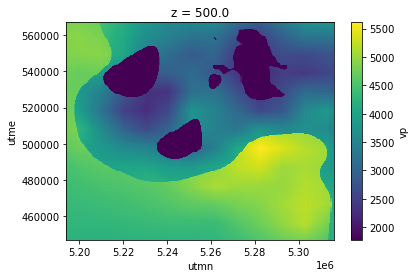

In [27]:
dsi.vp[:,:,1].plot()

In [28]:
new_utme = np.arange(ds.utme[0], ds.utme[-1], 300)
new_utmn = np.arange(ds.utmn[0], ds.utmn[-1], 300)
# new_z = np.arange(ds.z[0],ds.z[-1],500)
new_z = np.arange(ds.z[0],ds.z[-1],300)
dsi3 = ds.interp(utme=new_utme, utmn=new_utmn,z=new_z)
# dsi3 = ds.interp(z=new_z)

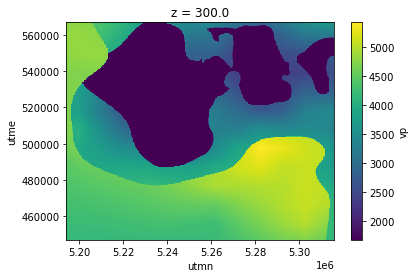

In [29]:
dsi3.vp[:,:,1].plot()

In [30]:
dsi3

<xarray.Dataset>
Dimensions:  (utme: 399, utmn: 405, z: 198)
Coordinates:
  * utme     (utme) float64 4.473e+05 4.476e+05 ... 5.664e+05 5.667e+05
  * utmn     (utmn) float64 5.194e+06 5.195e+06 ... 5.315e+06 5.316e+06
  * z        (z) float64 0.0 300.0 600.0 900.0 ... 5.85e+04 5.88e+04 5.91e+04
Data variables:
    vp       (utme, utmn, z) float64 4.103e+03 4.181e+03 ... 7.712e+03 7.733e+03

In [ ]:
dsi3.to_netcdf('small_model_0.3kmSpacingPwave.nc')

In [25]:
# planes = np.unique(planeoutput)
# planes = np.array(planes)
# vectors = np.unique(vectoroutput)
# vectors = np.array(vectors)
# points = np.unique(pointoutput)
# points = np.array(points)

# planes = np.unique(df['utme'].values)
# vectors =  np.unique(df['utmn'].values)
# points = l np.unique(df['z'].values)
# values = df['slow_len'].values

# planeoutput = [int(plane) for plane in planes]
# vectoroutput= [int(vector) for vector in vectors]
# pointoutput = [int(point) for point in points]

# %%time
# # rows = int(input("Enter the number of x you want: "))
# # cols = int(input("Enter the number of y you want: "))
# # points = int(input("Enter the number of points you want: "))
# # rows = len(planes)
# rows = 1
# # cols = len(vectors)
# cols = 1
# # pts = len(points)
# pts = 1
# nodes = rows*cols*pts # index for the slow_len, since it is already in order. I just need to get it into 
# myList = [[[0 for z in range(pts)] for y in range(cols)] for x in range(rows)]
# for x in range(cols):
#     for y in range(cols):
#         for z in range(pts):
#             for node in range(nodes):
#                 myList[x][y][z] = values[node]

In [26]:
# v.astype('f4').tofile('/Users/banjo/Projects/nll_pnsn/NLLoc/testCVM/model/cvmtest.P.mod.buf')

In [27]:
# v = np.fromfile('/Users/banjo/Projects/nll_pnsn/NLLoc/testCVM/model/cvmtest.P.mod.buf', dtype='f4')
# v.astype('f4').tofile('/Users/banjo/Projects/nll_pnsn/NLLoc/testCVM/model/cvmtest.P.mod.buf')

In [28]:
# a_3d_array = np.zeros((402,408,29))

In [29]:
# b_3d_array = np.array([[['x1'], ['z1'],[ 'y2']]])
# print(b_3d_array)

In [30]:
# rows = int(input("Enter the no.of rows you want: "))
# cols = int(input("Enter the number of cols you want: "))
# myList = [[0 for c in range(cols)] for r in range(rows)] 
# for r in range(rows):
#     for c in range(cols):
#         myList[r][c]= r*c
# print(myList)

In [31]:
# rows = int(input("Enter the number of x you want: "))
# cols = int(input("Enter the number of y you want: "))
# points = int(input("Enter the number of points you want: "))
# myList = [[[0 for z in range(points)] for y in range(cols)] for x in range(rows)]
# for x in range(rows):
#     for y in range(cols):
#         for z in range(points):
#             myList[x][y][z]= x*y*z
# print(myList)

In [32]:
# symbol = [[[v for col in range(29)] for col in range(408)] for row in range(402)] 
# # print(symbol)